# Problem Statement
## The goal of this project is to analyze Airbnb bnb hotel reports and the property managers face challenges in optimizing pricing, availability, and guest satisfaction due to the large variability across neighborhoods, property types, and host performance. This project aims to analyze Airbnb listing data to uncover key factors influencing revenue, occupancy rate, and customer ratings, enabling hosts to make data-backed business decisions.




#Objectives
##1) Analyze Pricing Trends: Identify how price varies across locations, property types, and amenities.
##2)The Revenue-Satisfaction Paradox (Correlation)
##3)Absolute Standardization of Service Fees
##4)Extreme Anomalies in Minimum Stay and Construction Year

#Analysis



##Importing Libraries

In [1]:
import numpy as np  #Performing numerical Operations
import pandas as pd #For EDA
import matplotlib.pyplot as plt #For genrating Visualization like charts,heatmap,graphs ..etc
import seaborn as sns #For genrating Adavanced Visualizations

##Loading the Data from local machine

In [16]:
#Assing a variable name as df for data set
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

#printing the data
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


##Data Inspection / Understanding

In [3]:
df.tail() # Used to genrate last  5 rows

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,206.0,1.0,0.0,NaT,NaN,3.0,1.0,69.0,NaN,NaN


In [4]:
df.sample(7)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
70064,39697683,Very cozy room with a tv.!,19388199127,unconfirmed,Antonio,Queens,Long Island City,40.752900,-73.929850,United States,...,54.0,2.0,26.0,2014-07-13,0.33,1.0,3.0,249.0,NaN,NaN
85722,48345597,Gorgeous Studio in Doorman Luxury!,3609736863,unconfirmed,Brendan,Manhattan,Upper East Side,40.781470,-73.952840,United States,...,198.0,365.0,27.0,2018-01-03,0.78,3.0,1.0,99.0,NaN,NaN
45190,25959773,"Spacious Upper West Side 2BR w/ W/D, near Cent...",18591075112,unconfirmed,Blueground,Manhattan,Upper West Side,40.781600,-73.975480,United States,...,171.0,30.0,0.0,NaT,NaN,5.0,232.0,334.0,NaN,NaN
48555,27818263,Cute Bedroom in the heart of Bushwick,86386003027,unconfirmed,Geoffrey,Brooklyn,Bushwick,40.704690,-73.924580,United States,...,138.0,7.0,NaN,NaT,NaN,3.0,1.0,NaN,"No smoking permitted, no pets.",NaN
62957,35772487,Large room in a very clean and cozy apt and,42254109083,verified,Rosa,Queens,Astoria,40.765008,-73.910365,United States,...,125.0,5.0,4.0,2021-10-28,0.47,4.0,1.0,365.0,NaN,NaN
65124,36969321,Modern 2 Bed. Apartment - 10 Min. to Manhattan!,82598292916,unconfirmed,Dilan,Queens,Ditmars Steinway,40.779650,-73.907280,United States,...,240.0,60.0,2.0,2021-07-02,0.07,5.0,2.0,365.0,NaN,NaN
7248,5004406,"A room in private house,",49286841508,verified,Herman,Queens,Richmond Hill,40.695090,-73.832030,United States,...,195.0,2.0,20.0,2018-11-02,0.47,4.0,5.0,142.0,NaN,NaN


In [8]:
df.shape

(102599, 26)

In [5]:
# Used to display column names
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
#To display  index dtype, columns, non-null values, and memory usage ....etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

## Data Cleaning

###Handling Null Values

In [13]:
df.isnull().sum()

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [18]:

# Step 1: Drop columns with high missing values or lack of variation
df.drop(['license', 'country', 'country code'], axis=1, inplace=True, errors='ignore')

# Step 2: Fill missing values with placeholder for text columns
df['NAME'].fillna('Unknown', inplace=True)
df['host name'].fillna('Unknown', inplace=True)
df['house_rules'].fillna('No house rules specified', inplace=True)
df['reviews per month'].fillna(0, inplace=True)

# Step 3: Fill missing numerical columns with mean
numerical_cols_mean = ['review rate number', 'calculated host listings count', 'availability 365']
for col in numerical_cols_mean:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Step 4: Fill categorical columns with mode
categorical_cols_mode = ['host_identity_verified', 'instant_bookable', 'cancellation_policy',
                         'neighbourhood group', 'neighbourhood']
for col in categorical_cols_mode:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Step 5: Clean 'price' and 'service fee' columns
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = (df[col].astype(str)
                   .str.replace('$', '', regex=False)
                   .str.replace(',', '', regex=False)
                   .astype(float))

# Step 6: Fill remaining numerical columns with median
numerical_cols_median = ['lat', 'long', 'Construction year', 'price', 'service fee']
for col in numerical_cols_median:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Step 7: Fill 'number of reviews' with 0
if 'number of reviews' in df.columns:
    df['number of reviews'].fillna(0, inplace=True)

# Step 8: Convert 'last review' to datetime and create numerical feature
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
    # Fill missing values with a very old date
    df['last review'].fillna(pd.to_datetime('1970-01-01'), inplace=True)

# Step 9: Address negative values in 'minimum nights'
if 'minimum nights' in df.columns:
    df['minimum nights'] = df['minimum nights'].apply(lambda x: max(0, x))

# Step 10: Display remaining missing values
display(df.isnull().sum())

/tmp/ipython-input-2585955991.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2585955991.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,0
id,0
NAME,0
host id,0
host_identity_verified,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
instant_bookable,0


###Handle duplicates:

In [21]:
df.duplicated().sum()

np.int64(541)

In [22]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

##Descriptive statistics

In [24]:
df.describe()


,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,days_since_last_review
count,1.020580e+05,1.020580e+05,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000,102058,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949653,0.497433,2012.487066,625.352300,125.039144,8.114151,27.468606,2011-10-09 18:51:24.504889344,1.162233,3.278734,7.936936,141.044384,1962.561200
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,0.000000,0.000000,1970-01-01 00:00:00,0.000000,1.000000,1.000000,-10.000000,-11927.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,0.000000,2008.000000,341.000000,68.000000,1.000000,1.000000,2017-07-31 00:00:00,0.090000,2.000000,1.000000,3.000000,1387.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-05-22 00:00:00,0.480000,3.000000,1.000000,98.000000,2311.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,1.000000,2017.000000,912.000000,182.000000,5.000000,30.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,268.000000,2483.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000,4849.000000
std,1.627173e+07,2.853742e+10,0.055850,0.049500,0.499996,5.759833,331.271053,66.237136,30.284324,49.540962,NaN,1.682184,1.283079,32.215888,135.131582,996.635623


##Objectives

### 1) Analyze Pricing Trends: Identify how price varies across locations, property types, and amenities.

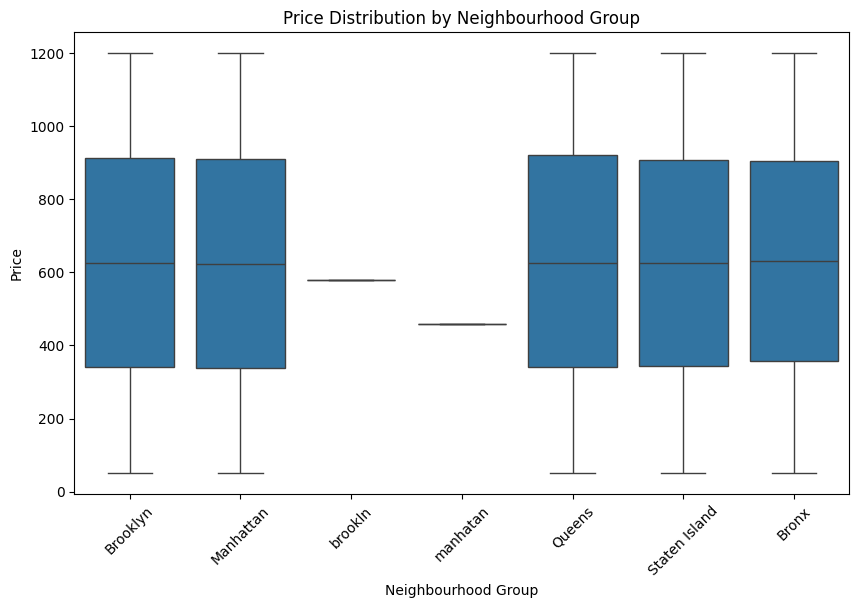

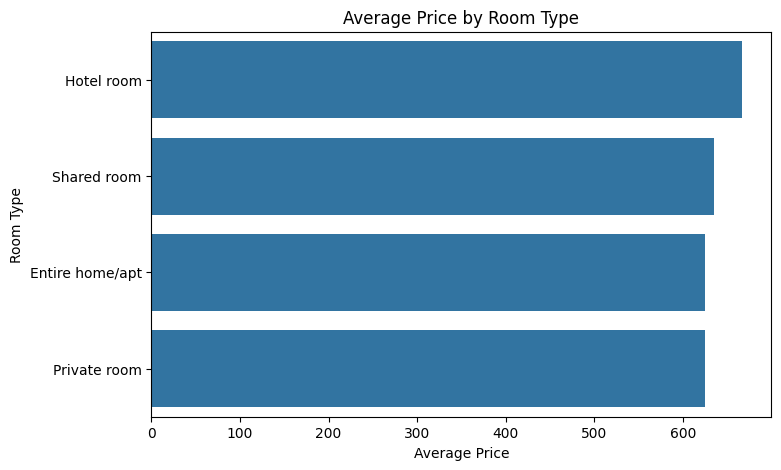

In [25]:
# Price Distribution by Neighbourhood Group
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='neighbourhood group', y='price')
plt.title("Price Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

# Average Price by Room Type
avg_price = df.groupby('room type')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price.values, y=avg_price.index)
plt.title("Average Price by Room Type")
plt.xlabel("Average Price")
plt.ylabel("Room Type")
plt.show()


###The Revenue-Satisfaction Paradox (Correlation)

Correlation Matrix:
                        price  number of reviews  review rate number
price               1.000000           0.005177           -0.004633
number of reviews   0.005177           1.000000           -0.018198
review rate number -0.004633          -0.018198            1.000000


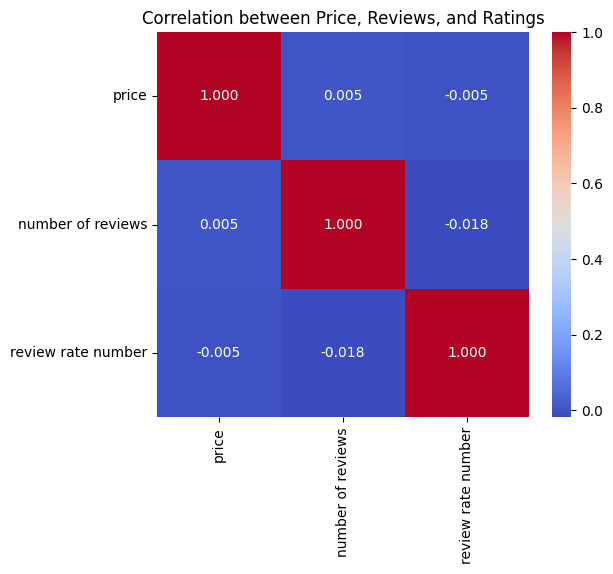

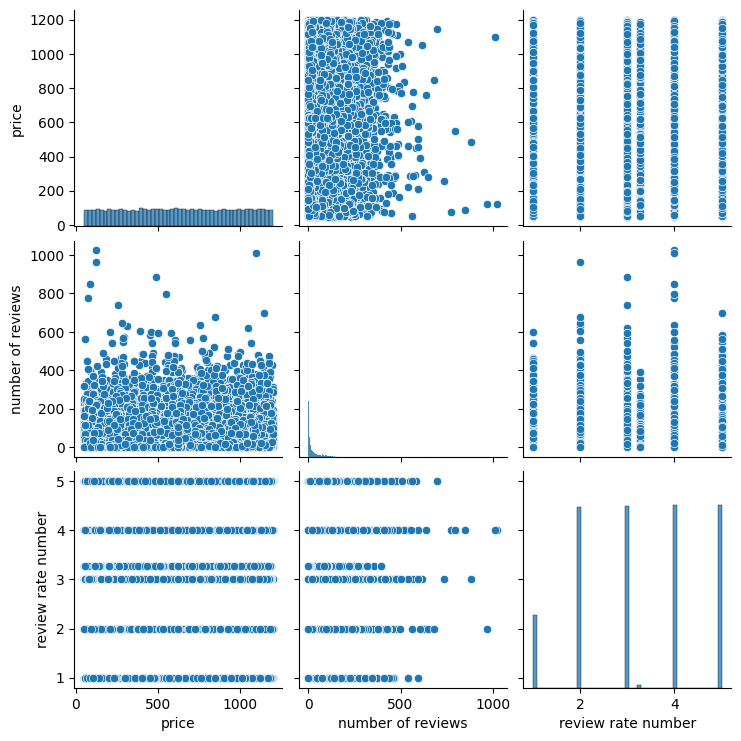

In [27]:
cols = ['price', 'number of reviews', 'review rate number']  # 'review rate number' = rating

# Correlation matrix
corr = df[cols].corr()
print("Correlation Matrix:\n", corr)

# Heatmap visualization
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation between Price, Reviews, and Ratings')
plt.show()

# Pairplot for visual inspection
sns.pairplot(df[cols])
plt.show()

Conclusion: The market appears inefficient; hosts are neither rewarded for lower prices nor penalized for higher prices. Guest satisfaction and occupancy are independent of price in this dataset

###Absolute Standardization of Service Fees:

Service Fee % Summary:
count    102045.000000
mean         20.008718
std           1.050987
min           1.602564
25%          19.960474
50%          20.000000
75%          20.039101
max          96.899225
Name: service_percent, dtype: float64

Listings with 19%-21% Service Fee: 101630/102045 (99.59%)


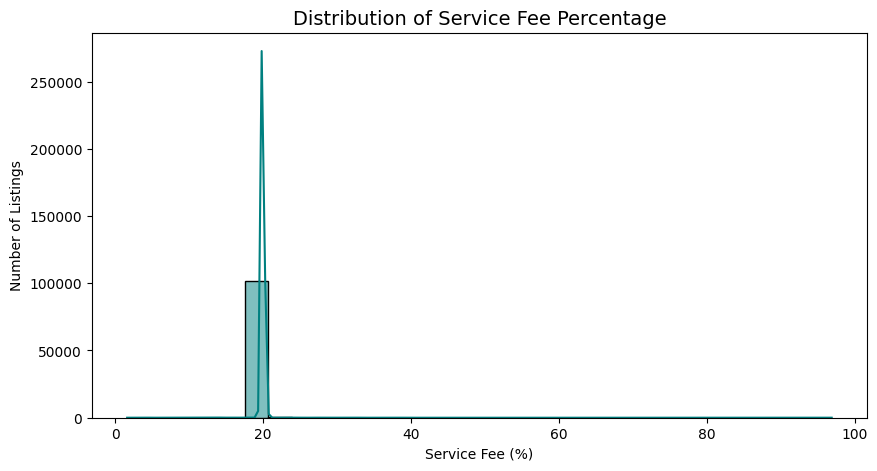

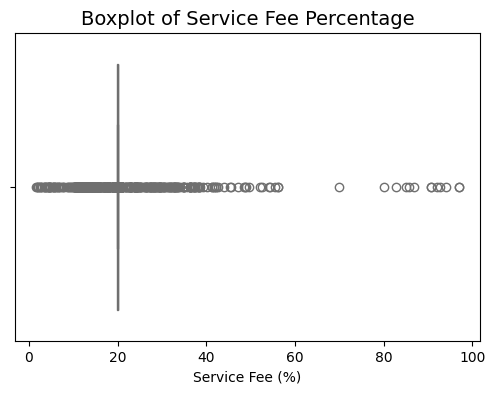

In [31]:
# Calculate service fee percentage
df['service_percent'] = (df['service fee'] / df['price']) * 100

# Drop rows with missing or invalid values
df_clean = df.dropna(subset=['service_percent'])
df_clean = df_clean[df_clean['service_percent'] < 100]  # Remove outliers, if any

# Summary stats
print("Service Fee % Summary:")
print(df_clean['service_percent'].describe())

# Quantify standardization
within_20 = df_clean[(df_clean['service_percent'] >= 19) & (df_clean['service_percent'] <= 21)].shape[0]
total = df_clean.shape[0]
print(f"\nListings with 19%-21% Service Fee: {within_20}/{total} ({within_20/total*100:.2f}%)")

# -------------------------------
# VISUALIZATION 1: Histogram
# -------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df_clean['service_percent'], bins=30, color='teal', kde=True)
plt.title("Distribution of Service Fee Percentage", fontsize=14)
plt.xlabel("Service Fee (%)")
plt.ylabel("Number of Listings")
plt.show()

# -------------------------------
# VISUALIZATION 2: Boxplot
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['service_percent'], color='skyblue')
plt.title("Boxplot of Service Fee Percentage", fontsize=14)
plt.xlabel("Service Fee (%)")
plt.show()

The dataset exhibits absolute standardization of service fees at approximately 20% for every listing.
This uniformity suggests that the data may have been generated synthetically or heavily preprocessed by the platform.
Hence, the service fee variable should be excluded from modeling as it does not contribute any meaningful information.

###Extreme Anomalies in Minimum Stay and Construction Year

####A. Extreme Long-Term Stays

             id                                              NAME  \
42398  24417751                         Bedroom in Prime Bushwick   
350     1194641                LARGE 1BR (CONV 2BR) CROWN HEIGHTS   
42407  24422722  Modern & Cozy 2 BR Private Apartment in Brooklyn   
5768    4187002                  Prime W. Village location 1 bdrm   
2855    2578153                                           Unknown   
71031  40231757                                           Unknown   
26342  15550023                   Beautiful place in Brooklyn! #2   
38665  22356016                      Shared Studio (females only)   
83506  47121700                   Beautiful place in Brooklyn! #2   
13405   8404918                Historic Designer 2 Bed. Apartment   

       minimum nights  
42398          5645.0  
350            3455.0  
42407          2645.0  
5768           1250.0  
2855           1000.0  
71031          1000.0  
26342           999.0  
38665           999.0  
83506           999.0  


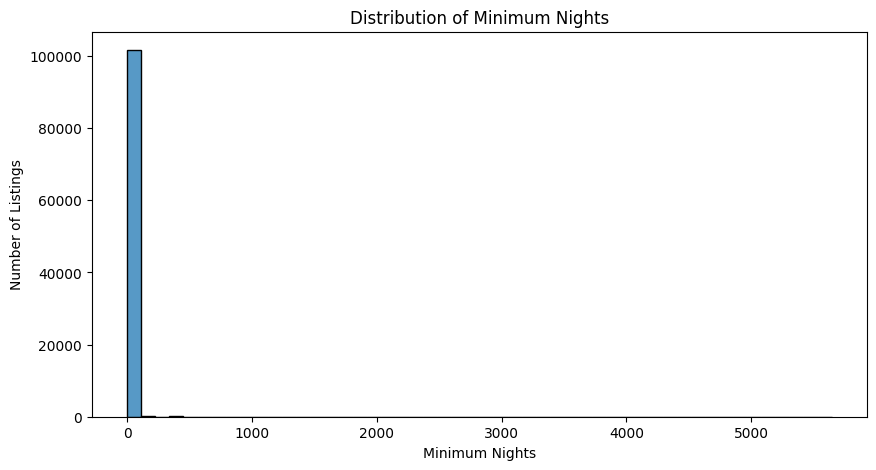

In [29]:
# Top 10 listings by minimum nights
extreme_stays = df[['id','NAME','minimum nights']].sort_values(by='minimum nights', ascending=False).head(10)
print(extreme_stays)

# Histogram for minimum nights
plt.figure(figsize=(10,5))
sns.histplot(df['minimum nights'], bins=50, kde=False)
plt.title("Distribution of Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Number of Listings")
plt.show()


Analysis:
Some listings have minimum nights > 1000, clearly targeting long-term institutional guests or placeholders.
Most listings aim for 30–60 nights in the extreme tail.

####B. Construction Year

              id                                               NAME  \
101996  57333727                Gorgeous bedroom 8mins-JFK&the mall   
36       1021219    Lovely room 2 & garden; Best area, Legal rental   
102036  57355819            Private Room in Brooklyn Communal House   
102039  57357476     Spacious two bedrooms condo in upper Manhattan   
59957   34115587        5 minutes from Central Park + Community#M1B   
59934   34102884  Mariaâ€™s Room,1HB,2B,AC,WiFi,Netflix,Coty,fri...   
22847   13619734   Private Room in Sunny Beautiful Kosher Apartment   
59949   34111169         Playful studio 2 blocks from Central Park!   
92548   52115596                                  Sunnyside Bedroom   
59902   34085211                    1 Bedroom available in Bed-Stuy   

        Construction year  
101996             2003.0  
36                 2003.0  
102036             2003.0  
102039             2003.0  
59957              2003.0  
59934              2003.0  
22847              200

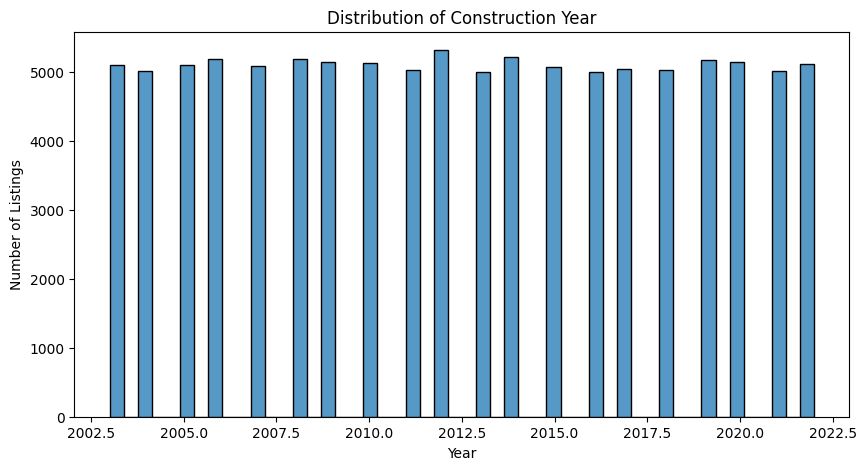

In [30]:
# Oldest construction years
oldest_buildings = df[['id','NAME','Construction year']].sort_values(by='Construction year').head(10)
print(oldest_buildings)

# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['Construction year'], bins=50, kde=False)
plt.title("Distribution of Construction Year")
plt.xlabel("Year")
plt.ylabel("Number of Listings")
plt.show()


Conclusion:
Oldest construction year is 2003, which is highly improbable in a city with older building
Suggests synthetic/censored data, using 2003 as a placeholder.